In [167]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [168]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [169]:
data = pd.read_csv("../../3_Annotation/antismash_results/bgc_antismash_class_counts.csv").set_index("Unnamed: 0")
df = data.copy()

data.insert(0, "New", np.nan)
data = data.reset_index()
data.head()


,Unnamed: 0,New,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,GCA_900186425.1,GCA_000422725.1,GCA_000687935.1,GCA_012931685.1,GCA_002217285.1,GCA_014220885.1,GCA_900141955.1,GCA_002217435.1,GCA_002954645.1,GCA_001404985.1,GCA_003054025.1,GCA_003201775.1,GCA_001439215.1,GCA_007993795.1,GCA_006491645.1,GCA_014305215.1,GCA_004328055.1,GCA_000971735.2,GCA_004762155.1,GCA_000518525.1,GCA_004122105.1,GCA_002482945.1,GCA_000829375.1,GCA_004016525.1,GCA_000422365.1,GCA_014219395.1,GCA_003860585.1,GCA_001686925.1,GCA_003057865.1,GCA_002899825.2,GCA_008017345.1,GCA_900610305.1,GCA_009993865.1,GCA_002379725.1,GCA_900111025.1,GCA_000744105.1,GCA_900115115.1,GCA_900130035.1,GCA_004349155.1,GCA_002422665.1,GCA_900141785.1,GCA_002217315.1,GCA_002727005.1,GCA_002375245.1,GCA_000735135.1,GCA_013372885.1,GCA_004363695.1,GCA_002862805.1,GCA_900106075.1,GCA_000520955.1,GCA_003232155.1,GCA_001544435.1,GCA_900182675.1,GCA_900299475.1,GCA_012273615.1,GCA_002256385.1,GCA_002022045.1,GCA_006088815.1,GCA_002999135.1,GCA_002302595.1,GCA_003344925.1,GCA_000224085.1,GCA_007990835.1,GCA_011612125.1,GCA_013001965.1,GCA_900610255.1,GCA_000971785.2,GCA_900107365.1,GCA_003970335.1,GCA_011058315.1,GCA_003070725.1,GCA_013394595.1,GCA_004362665.1,GCA_900141855.1,GCA_002835665.1,GCA_900538225.1,GCA_002171295.2,GCA_002023335.1,GCA_000626715.1,GCA_004959765.1,GCA_000423005.1,GCA_013002225.1,GCA_900104785.1,GCA_002439165.1,GCA_001684955.1,GCA_002909255.1,GCA_014220525.1,GCA_009994385.1,GCA_002711455.1,GCA_002862705.1,GCA_004369705.1,GCA_002700405.1,GCA_002728045.1,GCA_000379185.1,GCA_014220725.1,GCA_002728855.1,GCA_003971235.1,GCA_010645065.1,GCA_002471825.1,GCA_003318185.1,GCA_008370685.1,GCA_009725985.1,GCA_001510875.1,GCA_000769815.1,GCA_900142635.1,GCA_009495755.1,GCA_001439665.1,GCA_002721175.1,GCA_004293805.1,GCA_900101925.1,GCA_003581615.1,GCA_003634615.1,GCA_900446845.1,GCA_002693085.1,GCA_013042425.1,GCA_001761325.1,GCA_013294075.1,GCA_013043005.1,GCA_011305415.1,GCA_002429865.1,GCA_900453765.1,GCA_013214815.1,GCA_014220675.1,GCA_900447295.1,GCA_002713705.1,GCA_900447195.1,GCA_002691265.1,GCA_000982575.1,GCA_000757385.1,GCA_900239505.1,GCA_002453015.1,GCA_000799195.1,GCA_003487925.1,GCA_000495995.1,GCA_009938095.1,GCA_002713495.1,GCA_003968825.1,GCA_900108525.1,GCA_009827855.1,GCA_010500845.1,GCA_002453895.1,GCA_000282055.1,GCA_000799325.1,GCA_002364245.1,GCA_002831685.1,GCA_900186815.1,GCA_014243345.1,GCA_007097385.1,GCA_009360735.1,GCA_000799235.1,GCA_013373485.1,GCA_002312885.1,GCA_003970375.1,GCA_009498295.1,GCA_009659705.1,GCA_010906935.1,GCA_001686935.1,GCA_002746415.1,GCA_008501705.1,GCA_008017825.1,GCA_003254565.1,GCA_003525065.1,GCA_900108395.1,GCA_004349135.1,GCA_002366675.1,GCA_002072105.2,GCA_002401215.1,GCA_003315315.1,GCA_014220605.1,GCA_014050215.1,GCA_003014895.1,GCA_007474535.1,GCA_008124555.1,GCA_009753805.1,GCA_014219825.1,GCA_902705525.1,GCA_002899875.1,GCA_002292245.1,GCA_003058265.1,GCA_003852805.1,GCA_002401385.1,GCA_007474545.1,GCA_009797885.1,GCA_900108365.1,GCA_900239305.1,GCA_002315415.1,GCA_002375695.1,GCA_003410315.1,GCA_008017835.1,GCA_009886545.1,GCA_002530675.1,GCA_900111495.1,GCA_002433745.1,GCA_014220055.1,GCA_003055625.1,GCA_000243275.1,GCA_003293825.1,GCA_002785365.1,GCA_000496015.1,GCA_002364215.1,GCA_900239455.1,GCA_900113975.1,GCA_007997235.1,GCA_000060345.1,GCA_004684835.1,GCA_002723075.1,GCA_014239615.1,GCA_001889005.1,GCA_002120225.1,GCA_002483315.1,GCA_000153165.2,GCA_002025665.1,GCA_002631855.1,GCA_007050985.1,GCA_900299525.1,GCA_002023465.1,GCA_000744275.1,GCA_009994285.1,GCA_002708445.1,GCA_009993745.1,GCA_002311535.1,GCA_003208535.1,GCA_002354835.1,GCA_014218945.1,GCA_900109345.1,GCA_002484335.1,GCA_003001855.1,GCA_011392075.1,GCA_003097655.1,GCA_002722255.1,GCA_000382425.1,GCA_003298875.1,GCA_002514735.1,GCA_008629655.1,GCA_002399805.1,GCA_007997385.1,GCA_006778065.1,GCA_014219625.1,GCA_014220005.1,

In [170]:
df["Total"] = df.sum(axis=1)
df = df[["Total"]]
df = df.sort_values(by="Total", ascending=False)
df_major = df.copy().reset_index()
df_major["New"] = np.nan
df_major.head()


,Unnamed: 0,Total,New
0,terpene,3128,NaN
1,"arylpolyene,resorcinol",737,NaN
2,T3PKS,686,NaN
3,siderophore,664,NaN
4,arylpolyene,611,NaN


In [171]:
Terpene=["terpene"]

arylpolyene_resorcinol = ["arylpolyene,resorcinol", "resorcinol,arylpolyene"]

T3PKS = [ "t3pks", "3PKS", "T3PKS", "T3PKS,betalactone", "T3PKS,arylpolyene", 
		   "arylpolyene,T3PKS", "arylpolyene,resorcinol,T3PKS", 
		   "lanthipeptide,T3PKS,bacteriocin",
		   "betalactone,T3PKS", "terpene,T3PKS", "T3PKS,terpene", 
		   "T3PKS,arylpolyene,resorcinol", "T3PKS,resorcinol"]
# siderophore
Siderophore = ["siderophore"]

arylpolyene = ["arylpolyene"]

betalactone = ["betalactone"]


# NRPS_other: nrps and other type, except pks
NRPS = ["NRPS-like", "NRPS","thioamide-NRP", "NRPS,siderophore", "NRPS,lanthipeptide", 
				"terpene,NRPS-like,betalactone", "NRPS,indole", 
				"ladderane,NRPS","NRPS-like,bacteriocin","NRPS,proteusin,LAP"
				"NRPS-like,lanthipeptide", "NRPS,betalactone", 
				"NRPS-like,siderophore","NRPS,ladderane","NRPS-like,terpene", 
				"NRPS,LAP,proteusin", "arylpolyene,resorcinol,NRPS",
				"NRPS-like,betalactone", "NRPS,terpene", "siderophore,NRPS", 
				"terpene,NRPS-like", "NRPS-like,NRPS,siderophore",
				"NRPS-like,lanthipeptide", "NRPS,proteusin,LAP"
				]
				
# NRPS_PKS_hybrid: nrps with pks
NRPS_PKS_hybrid =["T1PKS,NRPS", "NRPS,T1PKS", "NRPS,transAT-PKS", 
				  "PKS-like,transAT-PKS,NRPS", "NRPS-like,T3PKS", 
				  "NRPS-like,T1PKS","NRPS,T1PKS,lanthipeptide",
				  "T3PKS,NRPS","NRPS,T1PKS,T3PKS", "T1PKS,NRPS-like", 
				  "transAT-PKS,transAT-PKS-like,NRPS-like,PKS-like,T3PKS", 
				  "T3PKS,NRPS,T1PKS", "T1PKS,NRPS", "NRPS,T1PKS,betalactone", 
				  "NRPS,bacteriocin","T3PKS,hglE-KS,siderophore,NRPS,T1PKS", 
				  "hglE-KS,T1PKS,NRPS,betalactone","transAT-PKS,NRPS",
				  "transAT-PKS-like,transAT-PKS,PKS-like,NRPS,T1PKS", 
				  "betalactone,NRPS-like", "transAT-PKS,NRPS-like", 
				  "NRPS,T1PKS,bacteriocin","NRPS-like,hglE-KS,T1PKS",
				  "NRPS,T1PKS,siderophore,hglE-KS,T3PKS", "T3PKS,NRPS-like",
				  "NRPS,T3PKS","NRPS,T1PKS,T3PKS","thioamide-NRP",
				  "transAT-PKS-like,transAT-PKS,T3PKS,PKS-like,NRPS-like",
				  "NRPS,hglE-KS,T1PKS", "transAT-PKS,NRPS,PKS-like",
				  "transAT-PKS,transAT-PKS-like,NRPS-like,PKS-like,T3PKS",
				  "T1PKS,hglE-KS,NRPS,siderophore", "transAT-PKS,NRPS,PKS-like",
				  "NRPS,T1PKS,siderophore",
				  ]
# transAT_PKS: only transAT_PKS (may have other types of PKS)
transAT_PKS = ["transAT-PKS","transatpks","transAT-PKS,PKS-like",
			   "transAT-PKS,PKS-like", 
			  "transAT-PKS5", "transAT-PKS-like", 
			  "transAT-PKS-like,transAT-PKS,PKS-like", 
			  "transAT-PKS,PKS-like,transAT-PKS-like",
			  "transAT-PKS,transAT-PKS-like", "transAT-PKS,bacteriocin",
			  "transAT-PKS-like,transAT-PKS,PKS-like,ladderane",
			  "transAT-PKS-like,transAT-PKS",
			  "transAT-PKS,PKS-like,ladderane"     
			  ]
# PKSI
#PKSI = ["t1pks", "T1PKS"]
# PKSII
#PKSII = ["t2pks"]
# PKSIII

#PKS_other: combination of pks with other pks or with other types (except nrps)
PKS = ["t1pks", "T1PKS","t2pks","otherks", "hglks", "PKS", "PKS-like", "hglE-KS", "hglE-KS,T1PKS",
			   "T1PKS,hglE-KS", "hglE-KS,T1PKS,terpene", 
			   "ladderane,transAT-PKS,PKS-like,transAT-PKS-like", "T1PKS,PUFA",
			   "ladderane,transAT-PKS,PKS-like","T1PKS,PUFA,hglE-KS"
			   "transAT-PKS,PKS-like,ladderane", "T1PKS,hglE-KS,terpene",
			   "lanthipeptide,T1PKS,hglE-KS", "hglE-KS,T1PKS,lanthipeptide",
			   "terpene,hglE-KS,PUFA,T1PKS", "terpene,T1PKS,hglE-KS",
			   "terpene,hglE-KS,T1PKS", "hglE-KS,PUFA,T1PKS", 
			   "PUFA,T1PKS,hglE-KS","hglE-KS,terpene,T1PKS","PUFA,T1PKS",
			   "lanthipeptide,hglE-KS,T1PKS", "hglE-KS,T1PKS,PUFA", 
			   ]
# Saccharides
Saccharides=["amglyccycl", "oligosaccharide", "cf_saccharide", "saccharide"]


# only RiPPs
RiPPs= ["lantipeptide", "thiopeptide", "bacteriocin", "linaridin", "proteusin", 
		   "cyanobactin", "glycocin", "LAP", "lassopeptide", "sactipeptide", 
		   "bottromycin", "head_to_tail", "microcin", "microviridin", 
		   "lanthipeptide", "lipolanthine", "RaS-RiPP", "fungal-RiPP",
		   "bacteriocin,lanthipeptide", "lanthipeptide,bacteriocin",
		   "thiopeptide,LAP", "LAP,proteusin", "proteusin,LAP","RaS-RiPP",
		   "proteusin,LAP,bacteriocin","LAP,proteusin,bacteriocin",
		   "TfuA-related"]


# Others: diversified combinations and bgcs that don't fit previous classes
Others = ["acyl_amino_acids",  "aminocoumarin", "ectoine", 
			"butyrolactone", "nucleoside", "melanin", "phosphoglycolipid", 
			"phenazine", "phosphonate", "other", "cf_putative", "resorcinol", 
			"indole", "ladderane", "PUFA", "furan", "hserlactone", "fused", 
			"cf_fatty_acid",  "blactam", "fatty_acid" "PpyS-KS", 
			"CDPS",  "PBD", "tropodithietic-acid", "NAGGN", 
			"halogenated",  "terpene,bacteriocin","arylpolyene,bacteriocin",
			"arylpolyene,resorcinol", "resorcinol,arylpolyene", 
			"siderophore,terpene","terpene,ladderane","bacteriocin,acyl_amino_acids",
			"lanthipeptide,terpene", "arylpolyene,lanthipeptide,resorcinol",
			"acyl_amino_acids,bacteriocin", "ladderane,terpene", 
			"arylpolyene,resorcinol","arylpolyene,resorcinol,bacteriocin", 
			"lanthipeptide,siderophore","bacteriocin,arylpolyene,resorcinol", 
			"siderophore,bacteriocin", "terpene,lanthipeptide",
			"terpene,siderophore","terpene,arylpolyene,resorcinol",
			"terpene,betalactone", "bacteriocin,siderophore", 
			"terpene,bacteriocin,siderophore","terpene,arylpolyene"
			]

In [172]:
x=0
for x in (range(len(df_major))):
	a = df_major.iloc[x,0]
	#print(a)
	if a in NRPS:
		df_major.iloc[x,2] = "NRPS"
		#print(a +" is NRPS")
	elif a in NRPS_PKS_hybrid:
		df_major.iloc[x,2] = "NRPS-PKS_hybrid"
		#print(a +" is NRPS_hybrid")
	elif a in transAT_PKS:
		df_major.iloc[x,2] = "transAT-PKS"
		#print(a +" is transAT_PKS")    
	elif a in T3PKS:
		df_major.iloc[x,2] ="T3PKS"
		#print(a +" is PKSIII")
	elif a in PKS:
		df_major.iloc[x,2] ="PKS"
		#print(a +" is PKS_other")
	elif a in Saccharides:
		df_major.iloc[x,2] ="Saccharides"
		#print(a +" is Saccharides")        
	elif a in Terpene:
		df_major.iloc[x,2]="Terpene"
		#print(a +" is terpene")
	elif a in Siderophore:
		df_major.iloc[x,2] ="Siderophore"
		#print(a +" is siderophore")            
	elif a in RiPPs:
		df_major.iloc[x,2] ="RiPPs"
	elif a in arylpolyene_resorcinol:
		df_major.iloc[x,2] ="Arylpolyene-resorcinol"
	elif a in arylpolyene:
		df_major.iloc[x,2] ="Arylpolyene"
	elif a in betalactone:
		df_major.iloc[x,2] ="Betalactone"
	elif a in Others:
		df_major.iloc[x,2] ="Others"
	else:
		df_major.iloc[x,2] = "Unclassified"
		print(str(a) + " is unclassified")
	x +=1
df_major.head()

,Unnamed: 0,Total,New
0,terpene,3128,Terpene
1,"arylpolyene,resorcinol",737,Arylpolyene-resorcinol
2,T3PKS,686,T3PKS
3,siderophore,664,Siderophore
4,arylpolyene,611,Arylpolyene


In [173]:
x=0
for x in (range(len(data))):
	a = data.iloc[x,0]
	#print(a)
	if a in NRPS:
		data.iloc[x,1] = "NRPS"
		#print(a +" is NRPS")
	elif a in NRPS_PKS_hybrid:
		data.iloc[x,1] = "NRPS-PKS hybrid"
		#print(a +" is NRPS_hybrid")
	elif a in transAT_PKS:
		data.iloc[x,1] = "transAT-PKS"
		#print(a +" is transAT_PKS")    
	elif a in T3PKS:
		data.iloc[x,1] ="T3PKS"
		#print(a +" is PKSIII")
	elif a in PKS:
		data.iloc[x,1] ="PKS"
		#print(a +" is PKS_other")
	elif a in Saccharides:
		data.iloc[x,1] ="Saccharides"
		#print(a +" is Saccharides")        
	elif a in Terpene:
		data.iloc[x,1]="Terpene"
		#print(a +" is terpene")
	elif a in Siderophore:
		data.iloc[x,1] ="Siderophore"
		#print(a +" is siderophore")            
	elif a in RiPPs:
		data.iloc[x,1] ="RiPPs"
	elif a in arylpolyene_resorcinol:
		data.iloc[x,1] ="Arylpolyene-resorcinol"
	elif a in arylpolyene:
		data.iloc[x,1] ="Arylpolyene"
	elif a in betalactone:
		data.iloc[x,1] ="Betalactone"
	elif a in Others:
		data.iloc[x,1] ="Others"
	else:
		data.iloc[x,1] = "Unclassified"
		print(str(a) + " is unclassified")
	x +=1
data.head()

,Unnamed: 0,New,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,GCA_900186425.1,GCA_000422725.1,GCA_000687935.1,GCA_012931685.1,GCA_002217285.1,GCA_014220885.1,GCA_900141955.1,GCA_002217435.1,GCA_002954645.1,GCA_001404985.1,GCA_003054025.1,GCA_003201775.1,GCA_001439215.1,GCA_007993795.1,GCA_006491645.1,GCA_014305215.1,GCA_004328055.1,GCA_000971735.2,GCA_004762155.1,GCA_000518525.1,GCA_004122105.1,GCA_002482945.1,GCA_000829375.1,GCA_004016525.1,GCA_000422365.1,GCA_014219395.1,GCA_003860585.1,GCA_001686925.1,GCA_003057865.1,GCA_002899825.2,GCA_008017345.1,GCA_900610305.1,GCA_009993865.1,GCA_002379725.1,GCA_900111025.1,GCA_000744105.1,GCA_900115115.1,GCA_900130035.1,GCA_004349155.1,GCA_002422665.1,GCA_900141785.1,GCA_002217315.1,GCA_002727005.1,GCA_002375245.1,GCA_000735135.1,GCA_013372885.1,GCA_004363695.1,GCA_002862805.1,GCA_900106075.1,GCA_000520955.1,GCA_003232155.1,GCA_001544435.1,GCA_900182675.1,GCA_900299475.1,GCA_012273615.1,GCA_002256385.1,GCA_002022045.1,GCA_006088815.1,GCA_002999135.1,GCA_002302595.1,GCA_003344925.1,GCA_000224085.1,GCA_007990835.1,GCA_011612125.1,GCA_013001965.1,GCA_900610255.1,GCA_000971785.2,GCA_900107365.1,GCA_003970335.1,GCA_011058315.1,GCA_003070725.1,GCA_013394595.1,GCA_004362665.1,GCA_900141855.1,GCA_002835665.1,GCA_900538225.1,GCA_002171295.2,GCA_002023335.1,GCA_000626715.1,GCA_004959765.1,GCA_000423005.1,GCA_013002225.1,GCA_900104785.1,GCA_002439165.1,GCA_001684955.1,GCA_002909255.1,GCA_014220525.1,GCA_009994385.1,GCA_002711455.1,GCA_002862705.1,GCA_004369705.1,GCA_002700405.1,GCA_002728045.1,GCA_000379185.1,GCA_014220725.1,GCA_002728855.1,GCA_003971235.1,GCA_010645065.1,GCA_002471825.1,GCA_003318185.1,GCA_008370685.1,GCA_009725985.1,GCA_001510875.1,GCA_000769815.1,GCA_900142635.1,GCA_009495755.1,GCA_001439665.1,GCA_002721175.1,GCA_004293805.1,GCA_900101925.1,GCA_003581615.1,GCA_003634615.1,GCA_900446845.1,GCA_002693085.1,GCA_013042425.1,GCA_001761325.1,GCA_013294075.1,GCA_013043005.1,GCA_011305415.1,GCA_002429865.1,GCA_900453765.1,GCA_013214815.1,GCA_014220675.1,GCA_900447295.1,GCA_002713705.1,GCA_900447195.1,GCA_002691265.1,GCA_000982575.1,GCA_000757385.1,GCA_900239505.1,GCA_002453015.1,GCA_000799195.1,GCA_003487925.1,GCA_000495995.1,GCA_009938095.1,GCA_002713495.1,GCA_003968825.1,GCA_900108525.1,GCA_009827855.1,GCA_010500845.1,GCA_002453895.1,GCA_000282055.1,GCA_000799325.1,GCA_002364245.1,GCA_002831685.1,GCA_900186815.1,GCA_014243345.1,GCA_007097385.1,GCA_009360735.1,GCA_000799235.1,GCA_013373485.1,GCA_002312885.1,GCA_003970375.1,GCA_009498295.1,GCA_009659705.1,GCA_010906935.1,GCA_001686935.1,GCA_002746415.1,GCA_008501705.1,GCA_008017825.1,GCA_003254565.1,GCA_003525065.1,GCA_900108395.1,GCA_004349135.1,GCA_002366675.1,GCA_002072105.2,GCA_002401215.1,GCA_003315315.1,GCA_014220605.1,GCA_014050215.1,GCA_003014895.1,GCA_007474535.1,GCA_008124555.1,GCA_009753805.1,GCA_014219825.1,GCA_902705525.1,GCA_002899875.1,GCA_002292245.1,GCA_003058265.1,GCA_003852805.1,GCA_002401385.1,GCA_007474545.1,GCA_009797885.1,GCA_900108365.1,GCA_900239305.1,GCA_002315415.1,GCA_002375695.1,GCA_003410315.1,GCA_008017835.1,GCA_009886545.1,GCA_002530675.1,GCA_900111495.1,GCA_002433745.1,GCA_014220055.1,GCA_003055625.1,GCA_000243275.1,GCA_003293825.1,GCA_002785365.1,GCA_000496015.1,GCA_002364215.1,GCA_900239455.1,GCA_900113975.1,GCA_007997235.1,GCA_000060345.1,GCA_004684835.1,GCA_002723075.1,GCA_014239615.1,GCA_001889005.1,GCA_002120225.1,GCA_002483315.1,GCA_000153165.2,GCA_002025665.1,GCA_002631855.1,GCA_007050985.1,GCA_900299525.1,GCA_002023465.1,GCA_000744275.1,GCA_009994285.1,GCA_002708445.1,GCA_009993745.1,GCA_002311535.1,GCA_003208535.1,GCA_002354835.1,GCA_014218945.1,GCA_900109345.1,GCA_002484335.1,GCA_003001855.1,GCA_011392075.1,GCA_003097655.1,GCA_002722255.1,GCA_000382425.1,GCA_003298875.1,GCA_002514735.1,GCA_008629655.1,GCA_002399805.1,GCA_007997385.1,GCA_006778065.1,GCA_014219625.1,GCA_014220005.1,

In [177]:
dfx = data.copy()
dfx.head()

,Unnamed: 0,New,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,GCA_900186425.1,GCA_000422725.1,GCA_000687935.1,GCA_012931685.1,GCA_002217285.1,GCA_014220885.1,GCA_900141955.1,GCA_002217435.1,GCA_002954645.1,GCA_001404985.1,GCA_003054025.1,GCA_003201775.1,GCA_001439215.1,GCA_007993795.1,GCA_006491645.1,GCA_014305215.1,GCA_004328055.1,GCA_000971735.2,GCA_004762155.1,GCA_000518525.1,GCA_004122105.1,GCA_002482945.1,GCA_000829375.1,GCA_004016525.1,GCA_000422365.1,GCA_014219395.1,GCA_003860585.1,GCA_001686925.1,GCA_003057865.1,GCA_002899825.2,GCA_008017345.1,GCA_900610305.1,GCA_009993865.1,GCA_002379725.1,GCA_900111025.1,GCA_000744105.1,GCA_900115115.1,GCA_900130035.1,GCA_004349155.1,GCA_002422665.1,GCA_900141785.1,GCA_002217315.1,GCA_002727005.1,GCA_002375245.1,GCA_000735135.1,GCA_013372885.1,GCA_004363695.1,GCA_002862805.1,GCA_900106075.1,GCA_000520955.1,GCA_003232155.1,GCA_001544435.1,GCA_900182675.1,GCA_900299475.1,GCA_012273615.1,GCA_002256385.1,GCA_002022045.1,GCA_006088815.1,GCA_002999135.1,GCA_002302595.1,GCA_003344925.1,GCA_000224085.1,GCA_007990835.1,GCA_011612125.1,GCA_013001965.1,GCA_900610255.1,GCA_000971785.2,GCA_900107365.1,GCA_003970335.1,GCA_011058315.1,GCA_003070725.1,GCA_013394595.1,GCA_004362665.1,GCA_900141855.1,GCA_002835665.1,GCA_900538225.1,GCA_002171295.2,GCA_002023335.1,GCA_000626715.1,GCA_004959765.1,GCA_000423005.1,GCA_013002225.1,GCA_900104785.1,GCA_002439165.1,GCA_001684955.1,GCA_002909255.1,GCA_014220525.1,GCA_009994385.1,GCA_002711455.1,GCA_002862705.1,GCA_004369705.1,GCA_002700405.1,GCA_002728045.1,GCA_000379185.1,GCA_014220725.1,GCA_002728855.1,GCA_003971235.1,GCA_010645065.1,GCA_002471825.1,GCA_003318185.1,GCA_008370685.1,GCA_009725985.1,GCA_001510875.1,GCA_000769815.1,GCA_900142635.1,GCA_009495755.1,GCA_001439665.1,GCA_002721175.1,GCA_004293805.1,GCA_900101925.1,GCA_003581615.1,GCA_003634615.1,GCA_900446845.1,GCA_002693085.1,GCA_013042425.1,GCA_001761325.1,GCA_013294075.1,GCA_013043005.1,GCA_011305415.1,GCA_002429865.1,GCA_900453765.1,GCA_013214815.1,GCA_014220675.1,GCA_900447295.1,GCA_002713705.1,GCA_900447195.1,GCA_002691265.1,GCA_000982575.1,GCA_000757385.1,GCA_900239505.1,GCA_002453015.1,GCA_000799195.1,GCA_003487925.1,GCA_000495995.1,GCA_009938095.1,GCA_002713495.1,GCA_003968825.1,GCA_900108525.1,GCA_009827855.1,GCA_010500845.1,GCA_002453895.1,GCA_000282055.1,GCA_000799325.1,GCA_002364245.1,GCA_002831685.1,GCA_900186815.1,GCA_014243345.1,GCA_007097385.1,GCA_009360735.1,GCA_000799235.1,GCA_013373485.1,GCA_002312885.1,GCA_003970375.1,GCA_009498295.1,GCA_009659705.1,GCA_010906935.1,GCA_001686935.1,GCA_002746415.1,GCA_008501705.1,GCA_008017825.1,GCA_003254565.1,GCA_003525065.1,GCA_900108395.1,GCA_004349135.1,GCA_002366675.1,GCA_002072105.2,GCA_002401215.1,GCA_003315315.1,GCA_014220605.1,GCA_014050215.1,GCA_003014895.1,GCA_007474535.1,GCA_008124555.1,GCA_009753805.1,GCA_014219825.1,GCA_902705525.1,GCA_002899875.1,GCA_002292245.1,GCA_003058265.1,GCA_003852805.1,GCA_002401385.1,GCA_007474545.1,GCA_009797885.1,GCA_900108365.1,GCA_900239305.1,GCA_002315415.1,GCA_002375695.1,GCA_003410315.1,GCA_008017835.1,GCA_009886545.1,GCA_002530675.1,GCA_900111495.1,GCA_002433745.1,GCA_014220055.1,GCA_003055625.1,GCA_000243275.1,GCA_003293825.1,GCA_002785365.1,GCA_000496015.1,GCA_002364215.1,GCA_900239455.1,GCA_900113975.1,GCA_007997235.1,GCA_000060345.1,GCA_004684835.1,GCA_002723075.1,GCA_014239615.1,GCA_001889005.1,GCA_002120225.1,GCA_002483315.1,GCA_000153165.2,GCA_002025665.1,GCA_002631855.1,GCA_007050985.1,GCA_900299525.1,GCA_002023465.1,GCA_000744275.1,GCA_009994285.1,GCA_002708445.1,GCA_009993745.1,GCA_002311535.1,GCA_003208535.1,GCA_002354835.1,GCA_014218945.1,GCA_900109345.1,GCA_002484335.1,GCA_003001855.1,GCA_011392075.1,GCA_003097655.1,GCA_002722255.1,GCA_000382425.1,GCA_003298875.1,GCA_002514735.1,GCA_008629655.1,GCA_002399805.1,GCA_007997385.1,GCA_006778065.1,GCA_014219625.1,GCA_014220005.1,

In [180]:
dfx.head()

,New,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,GCA_900186425.1,GCA_000422725.1,GCA_000687935.1,GCA_012931685.1,GCA_002217285.1,GCA_014220885.1,GCA_900141955.1,GCA_002217435.1,GCA_002954645.1,GCA_001404985.1,GCA_003054025.1,GCA_003201775.1,GCA_001439215.1,GCA_007993795.1,GCA_006491645.1,GCA_014305215.1,GCA_004328055.1,GCA_000971735.2,GCA_004762155.1,GCA_000518525.1,GCA_004122105.1,GCA_002482945.1,GCA_000829375.1,GCA_004016525.1,GCA_000422365.1,GCA_014219395.1,GCA_003860585.1,GCA_001686925.1,GCA_003057865.1,GCA_002899825.2,GCA_008017345.1,GCA_900610305.1,GCA_009993865.1,GCA_002379725.1,GCA_900111025.1,GCA_000744105.1,GCA_900115115.1,GCA_900130035.1,GCA_004349155.1,GCA_002422665.1,GCA_900141785.1,GCA_002217315.1,GCA_002727005.1,GCA_002375245.1,GCA_000735135.1,GCA_013372885.1,GCA_004363695.1,GCA_002862805.1,GCA_900106075.1,GCA_000520955.1,GCA_003232155.1,GCA_001544435.1,GCA_900182675.1,GCA_900299475.1,GCA_012273615.1,GCA_002256385.1,GCA_002022045.1,GCA_006088815.1,GCA_002999135.1,GCA_002302595.1,GCA_003344925.1,GCA_000224085.1,GCA_007990835.1,GCA_011612125.1,GCA_013001965.1,GCA_900610255.1,GCA_000971785.2,GCA_900107365.1,GCA_003970335.1,GCA_011058315.1,GCA_003070725.1,GCA_013394595.1,GCA_004362665.1,GCA_900141855.1,GCA_002835665.1,GCA_900538225.1,GCA_002171295.2,GCA_002023335.1,GCA_000626715.1,GCA_004959765.1,GCA_000423005.1,GCA_013002225.1,GCA_900104785.1,GCA_002439165.1,GCA_001684955.1,GCA_002909255.1,GCA_014220525.1,GCA_009994385.1,GCA_002711455.1,GCA_002862705.1,GCA_004369705.1,GCA_002700405.1,GCA_002728045.1,GCA_000379185.1,GCA_014220725.1,GCA_002728855.1,GCA_003971235.1,GCA_010645065.1,GCA_002471825.1,GCA_003318185.1,GCA_008370685.1,GCA_009725985.1,GCA_001510875.1,GCA_000769815.1,GCA_900142635.1,GCA_009495755.1,GCA_001439665.1,GCA_002721175.1,GCA_004293805.1,GCA_900101925.1,GCA_003581615.1,GCA_003634615.1,GCA_900446845.1,GCA_002693085.1,GCA_013042425.1,GCA_001761325.1,GCA_013294075.1,GCA_013043005.1,GCA_011305415.1,GCA_002429865.1,GCA_900453765.1,GCA_013214815.1,GCA_014220675.1,GCA_900447295.1,GCA_002713705.1,GCA_900447195.1,GCA_002691265.1,GCA_000982575.1,GCA_000757385.1,GCA_900239505.1,GCA_002453015.1,GCA_000799195.1,GCA_003487925.1,GCA_000495995.1,GCA_009938095.1,GCA_002713495.1,GCA_003968825.1,GCA_900108525.1,GCA_009827855.1,GCA_010500845.1,GCA_002453895.1,GCA_000282055.1,GCA_000799325.1,GCA_002364245.1,GCA_002831685.1,GCA_900186815.1,GCA_014243345.1,GCA_007097385.1,GCA_009360735.1,GCA_000799235.1,GCA_013373485.1,GCA_002312885.1,GCA_003970375.1,GCA_009498295.1,GCA_009659705.1,GCA_010906935.1,GCA_001686935.1,GCA_002746415.1,GCA_008501705.1,GCA_008017825.1,GCA_003254565.1,GCA_003525065.1,GCA_900108395.1,GCA_004349135.1,GCA_002366675.1,GCA_002072105.2,GCA_002401215.1,GCA_003315315.1,GCA_014220605.1,GCA_014050215.1,GCA_003014895.1,GCA_007474535.1,GCA_008124555.1,GCA_009753805.1,GCA_014219825.1,GCA_902705525.1,GCA_002899875.1,GCA_002292245.1,GCA_003058265.1,GCA_003852805.1,GCA_002401385.1,GCA_007474545.1,GCA_009797885.1,GCA_900108365.1,GCA_900239305.1,GCA_002315415.1,GCA_002375695.1,GCA_003410315.1,GCA_008017835.1,GCA_009886545.1,GCA_002530675.1,GCA_900111495.1,GCA_002433745.1,GCA_014220055.1,GCA_003055625.1,GCA_000243275.1,GCA_003293825.1,GCA_002785365.1,GCA_000496015.1,GCA_002364215.1,GCA_900239455.1,GCA_900113975.1,GCA_007997235.1,GCA_000060345.1,GCA_004684835.1,GCA_002723075.1,GCA_014239615.1,GCA_001889005.1,GCA_002120225.1,GCA_002483315.1,GCA_000153165.2,GCA_002025665.1,GCA_002631855.1,GCA_007050985.1,GCA_900299525.1,GCA_002023465.1,GCA_000744275.1,GCA_009994285.1,GCA_002708445.1,GCA_009993745.1,GCA_002311535.1,GCA_003208535.1,GCA_002354835.1,GCA_014218945.1,GCA_900109345.1,GCA_002484335.1,GCA_003001855.1,GCA_011392075.1,GCA_003097655.1,GCA_002722255.1,GCA_000382425.1,GCA_003298875.1,GCA_002514735.1,GCA_008629655.1,GCA_002399805.1,GCA_007997385.1,GCA_006778065.1,GCA_014219625.1,GCA_014220005.1,GCA_9001051

In [183]:
dfx.groupby("New").count()


GCA_002831645.1  GCA_001971785.1  GCA_002951395.1  \
New                                                                         
Arylpolyene                           1                1                1   
Arylpolyene-resorcinol                2                2                2   
Betalactone                           1                1                1   
NRPS                                 20               20               20   
NRPS-PKS hybrid                      30               30               30   
Others                               28               28               28   
PKS                                  19               19               19   
RiPPs                                15               15               15   
Siderophore                           1                1                1   
T3PKS                                11               11               11   
Terpene                               1                1                1   
transAT-PKS                          10               10               10   

                        GCA_903969135.1  GCA_009664855.1  GCA_001693415.1  \
New                                                                         
Arylpolyene                           1                1                1   
Arylpolyene-resorcinol                2                2                2   
Betalactone                           1                1                1   
NRPS                                 20               20               20   
NRPS-PKS hybrid                      30               30               30   
Others                               28               28               28   
PKS                                  19               19               19   
RiPPs                                15               15               15   
Siderophore                           1                1                1   
T3PKS                                11               11               11   
Terpene                               1                1                1   
transAT-PKS                          10               10               10   

                        GCA_008692195.1  GCA_004341805.1  GCA_003688495.1  \
New                                                                         
Arylpolyene                           1                1                1   
Arylpolyene-resorcinol                2                2                2   
Betalactone                           1                1                1   
NRPS                                 20               20               20   
NRPS-PKS hybrid                      30               30               30   
Others                               28               28               28   
PKS                                  19               19               19   
RiPPs                                15               15               15   
Siderophore                           1                1                1   
T3PKS                                11               11               11   
Terpene                               1                1                1   
transAT-PKS                          10               10               10   

                        GCA_000764795.1  GCA_900186425.1  GCA_000422725.1  \
New                                                                         
Arylpolyene                           1                1                1   
Arylpolyene-resorcinol                2                2                2   
Betalactone                           1                1                1   
NRPS                                 20               20               20   
NRPS-PKS hybrid                      30               30               30   
Others                               28               28               28   
PKS                                  19               19               19   
RiPPs                                15               15               15   
Siderophore      

In [ ]:
data = data.drop(columns=["Unnamed: 0"])
data = data.groupby("New").sum()
data = data.T
data.head()

New,Arylpolyene,Arylpolyene-resorcinol,Betalactone,NRPS,NRPS-PKS hybrid,Others,PKS,RiPPs,Siderophore,T3PKS,Terpene,transAT-PKS
GCA_002831645.1,0,0,0,0,0,1,0,1,0,1,1,0
GCA_001971785.1,0,0,0,0,0,0,0,1,0,0,1,0
GCA_002951395.1,0,0,0,0,0,0,0,0,1,0,1,0
GCA_903969135.1,0,1,0,1,0,0,1,3,1,0,1,0
GCA_009664855.1,0,1,1,0,0,0,0,2,0,1,2,0


In [ ]:
metadata = pd.read_csv("All_info.csv")
metadata = metadata[["Assembly accession", "Genus", "Family"]]
metadata.head()

,Assembly accession,Genus,Family
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae
2,GCA_000023465.1,Zunongwangia,Flavobacteriaceae
3,GCA_000023725.1,Kaistella,Weeksellaceae
4,GCA_000024125.1,Robiginitalea,Flavobacteriaceae


In [ ]:
x =metadata.groupby("Genus").count().reset_index()
x[x["Genus"]=="SCGC-AAA160-P02"]

,Genus,Assembly accession,Family
126,SCGC-AAA160-P02,4,4


In [ ]:
bgc = pd.merge(data, metadata, how="right", left_index=True, right_on="Assembly accession")
#bgc = bgc.drop(columns=["Genus","Family"])
bgc = bgc.set_index("Assembly accession")
bgc.head()
#bgc.to_csv("BGCs_for_ITOL")

,Arylpolyene,Arylpolyene-resorcinol,Betalactone,NRPS,NRPS-PKS hybrid,Others,PKS,RiPPs,Siderophore,T3PKS,Terpene,transAT-PKS,Genus,Family
Assembly accession,,,,,,,,,,,,,,
GCA_000016645.1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,Flavobacterium,Flavobacteriaceae
GCA_000023285.1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Capnocytophaga,Flavobacteriaceae
GCA_000023465.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Zunongwangia,Flavobacteriaceae
GCA_000023725.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Kaistella,Weeksellaceae
GCA_000024125.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,Robiginitalea,Flavobacteriaceae


In [ ]:
bgcs_mean = bgc.reset_index().groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean()
bgcs_mean = bgcs_mean.reset_index().set_index("Genus")
bgcs_mean = bgcs_mean.fillna(0)
bgcs_mean = bgcs_mean.sort_values(by=["Family", "Genus"])
bgcs_mean = bgcs_mean.drop(columns="Family")
bgcs_mean = bgcs_mean.sort_index(axis=1, ascending=False)

# specify the desired order of columns
column_order = ['Others', 'Terpene',  'transAT-PKS', 'T3PKS', 'PKS','Siderophore', 'RiPPs', 'NRPS-PKS hybrid', 'NRPS-other', 'NRPS', 'Betalactone', 'Arylpolyene-resorcinol', 'Arylpolyene']
# reindex the dataframe with the desired column order
bgcs_mean = bgcs_mean.reindex(columns=column_order)

bgcs_mean.head(10)

,Others,Terpene,transAT-PKS,T3PKS,PKS,Siderophore,RiPPs,NRPS-PKS hybrid,NRPS-other,NRPS,Betalactone,Arylpolyene-resorcinol,Arylpolyene
Genus,,,,,,,,,,,,,
Aequorivita,0.047619,1.023810,0.00000,0.904762,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.02381,0.857143,0.095238
Algibacter,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.666667,NaN,0.111111,0.00000,0.000000,0.000000
Aquimarina,0.205128,2.000000,0.74359,0.923077,0.076923,0.846154,1.564103,0.564103,NaN,1.846154,0.00000,0.512821,0.230769
Arenibacter,0.000000,2.681818,0.00000,0.954545,0.000000,0.000000,0.045455,0.000000,NaN,0.272727,0.00000,0.681818,0.045455
BACL21,0.000000,1.071429,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000
CG1-02-35-72,0.000000,1.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000
CG2-30-34-30,0.000000,1.000000,0.00000,0.875000,0.000000,0.000000,0.500000,0.000000,NaN,0.000000,0.00000,0.000000,0.125000
Capnocytophaga,0.578125,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,2.250000
Cellulophaga,0.380952,1.571429,0.00000,0.285714,0.000000,0.000000,0.047619,0.000000,NaN,0.000000,0.00000,0.047619,0.000000


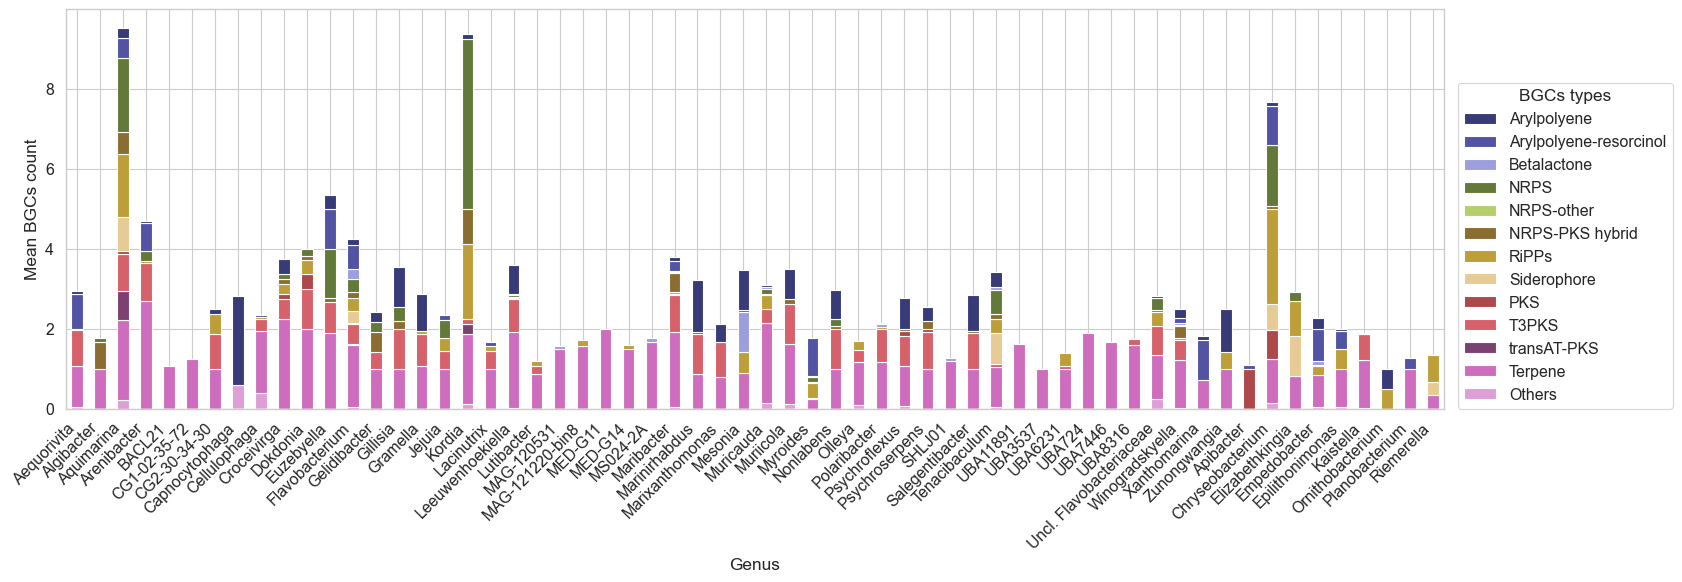

In [ ]:
from matplotlib import cm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.3) 

cmap = cm.get_cmap('tab20b_r') # Colour map (there are many others)

ax = bgcs_mean.plot(kind="bar", stacked=True, cmap=cmap,
              figsize=(17,6))

plt.ylabel('Mean BGCs count')
plt.xticks(rotation=45, horizontalalignment='right')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(1.01,0),title="BGCs types")
#leg._legend_box.align = "left"


plt.tight_layout()
plt.show()

ax.figure.savefig("BGCs_types.svg", dpi=300)